# House Prices Project

# 1. Data Analysis

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np


from IPython.display import display

from scipy import stats


from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns


pd.set_option('display.max_columns', None)
pd.reset_option('display.min_rows', None)

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
df = train.copy()
df_test = test.copy()
df_train = train.copy()
df_train = df_train.drop('SalePrice', axis = 1)
df_both = pd.concat([df_train, df_test], axis = 0, sort=False)



## SalePrice

In [3]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

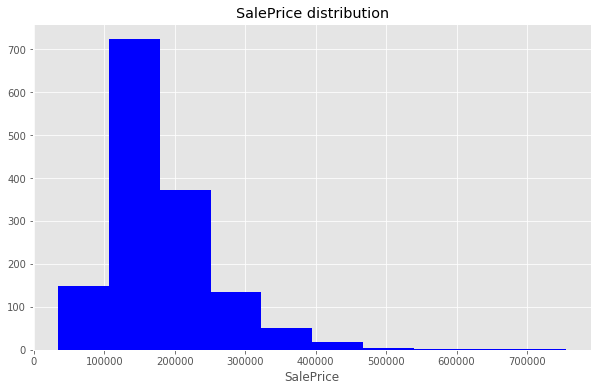

In [4]:
fig = plt.figure(figsize=(10,6))
plt.hist(df.SalePrice, color = 'b')
plt.xlabel('SalePrice')
plt.title('SalePrice distribution')
plt.show()

In [5]:
df['SalePrice'].skew()

1.8828757597682129

In [6]:
y = np.log(df['SalePrice'])


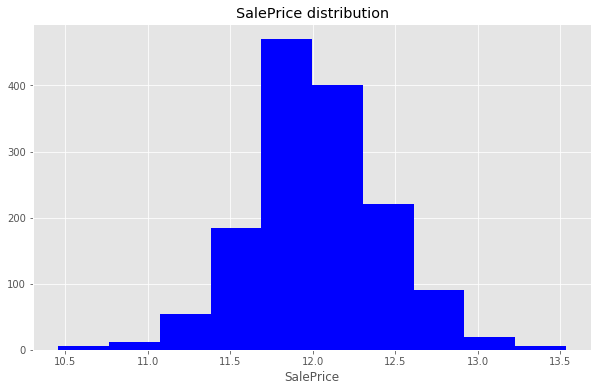

In [7]:
fig = plt.figure(figsize=(10,6))
plt.hist(y, color = 'b')
plt.xlabel('SalePrice')
plt.title('SalePrice distribution')
plt.show()

## A closer look at the features 

In [8]:
#scatterplots for each numerical feature against the SalePrice
#do we see a linear relationship


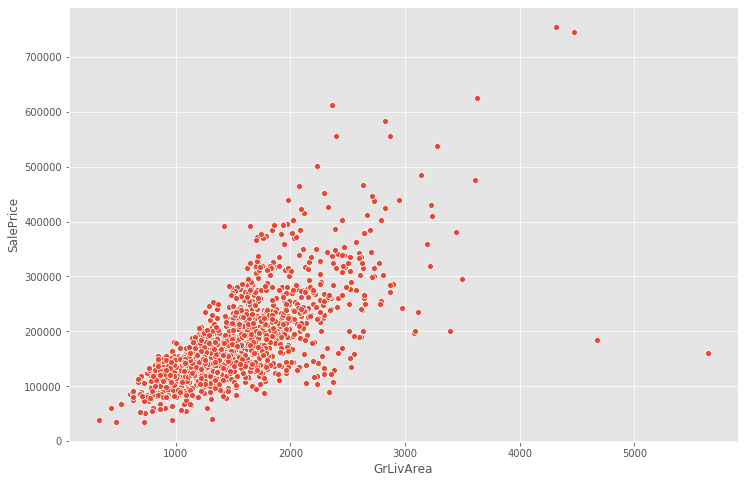

In [9]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', data = df)

In [10]:
df = df[df['GrLivArea']<4000]

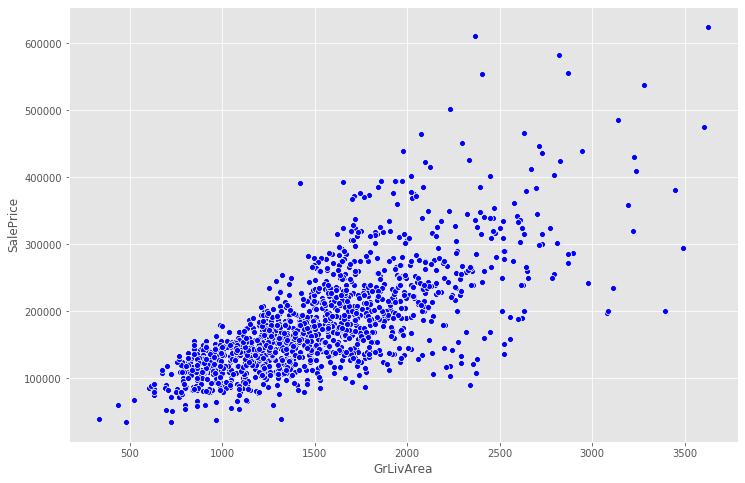

In [11]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', data = df, color = 'b')

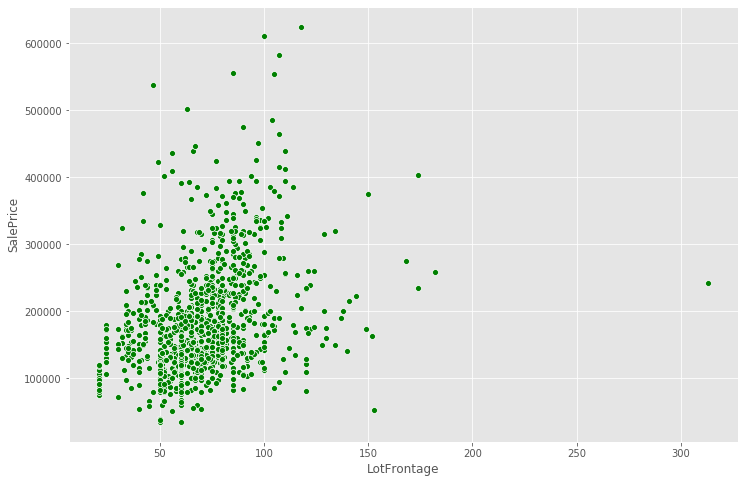

In [12]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x = 'LotFrontage', y = 'SalePrice', data = df, color = 'g')

In [13]:
df = df[df['LotFrontage']<200]

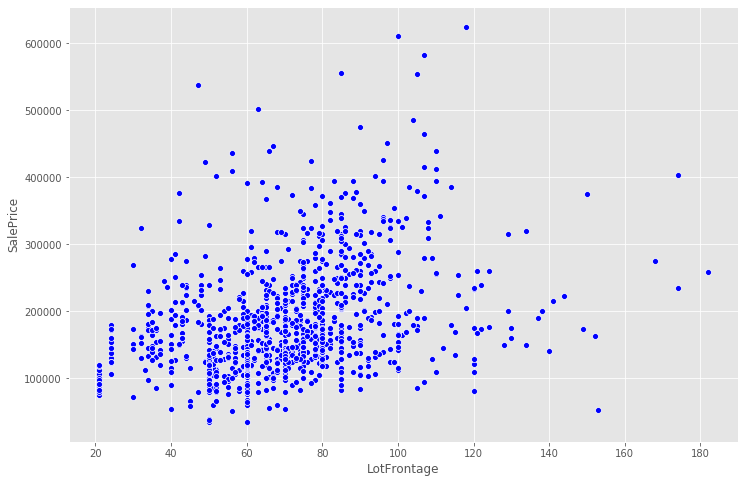

In [14]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x = 'LotFrontage', y = 'SalePrice', data = df, color = 'b')

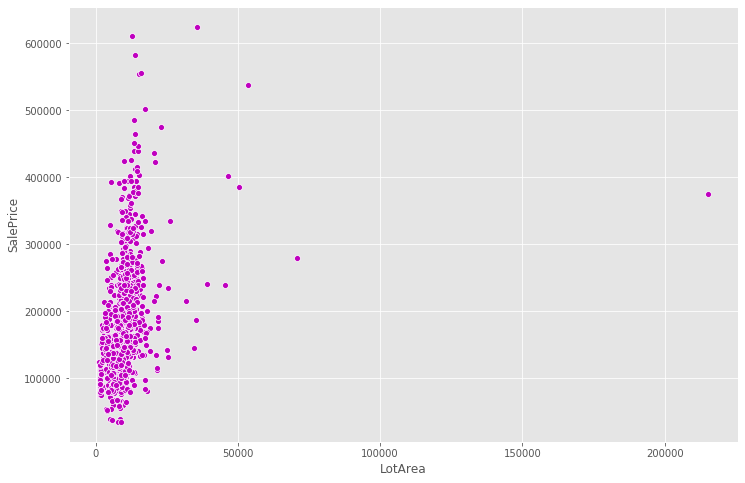

In [15]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x = 'LotArea', y = 'SalePrice', data = df, color ='m')

In [16]:
df = df[df['LotArea']<100000]

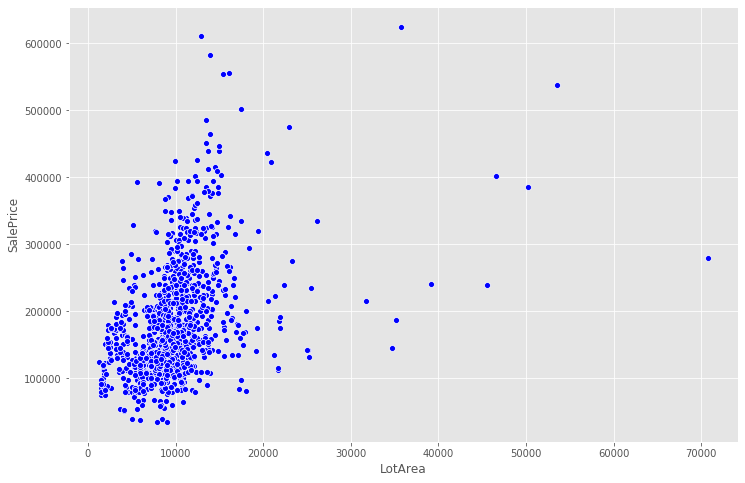

In [17]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x = 'LotArea', y = 'SalePrice', data = df, color ='b')

In [18]:
df = df[df['TotalBsmtSF']<3000]

In [19]:
df = df[df['1stFlrSF']<2500]

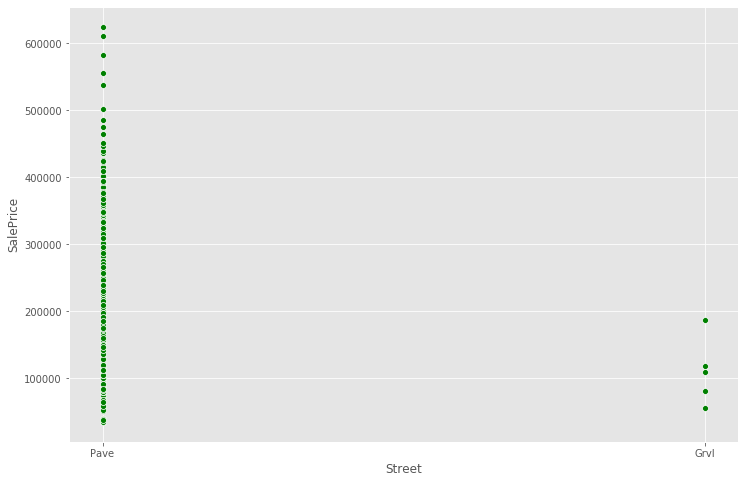

In [20]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x = 'Street', y = 'SalePrice', data = df, color = 'g')

In [21]:
y = np.log(df['SalePrice'])

In [22]:
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1192, dtype: float64

In [23]:
#df["Alley"] = np.where(df["Alley"].str.contains("Grvl"), 1, 0)

df = df[df['LandSlope'] != 'Sev']

df["LandSlope"] = np.where(df["LandSlope"].str.contains("Gtl"), 1, 0)

df["CentralAir"] = np.where(df["CentralAir"].str.contains("Y"), 1, 0)

#df["PavedDrive"] = np.where(df["PavedDrive"].str.contains("Y"), 1, 0)

In [24]:
print(((df[df == 0].count(axis = 0)/len(df.index)).sort_values(ascending = False)).head(10))

PoolArea         0.996633
3SsnPorch        0.984848
LowQualFinSF     0.979798
MiscVal          0.968855
BsmtHalfBath     0.948653
ScreenPorch      0.921717
BsmtFinSF2       0.896465
EnclosedPorch    0.850168
HalfBath         0.639731
BsmtFullBath     0.606061
dtype: float64


In [25]:
df['SaleCondition'].value_counts(normalize = True) * 100

Normal     80.303030
Partial    10.185185
Abnorml     6.902357
Family      1.430976
Alloca      0.841751
AdjLand     0.336700
Name: SaleCondition, dtype: float64

In [26]:
#more than 95% take the same values 
df = df.drop(['RoofMatl', 'BsmtCond','Heating', 'GarageCond'], axis = 1)

In [27]:
df = df.drop(['Utilities', 'Street'], axis = 1)

In [28]:
df = df.drop(['PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal', 'BsmtFinType2','BsmtFinSF1', 'Condition2','BsmtFinSF2'], axis = 1)

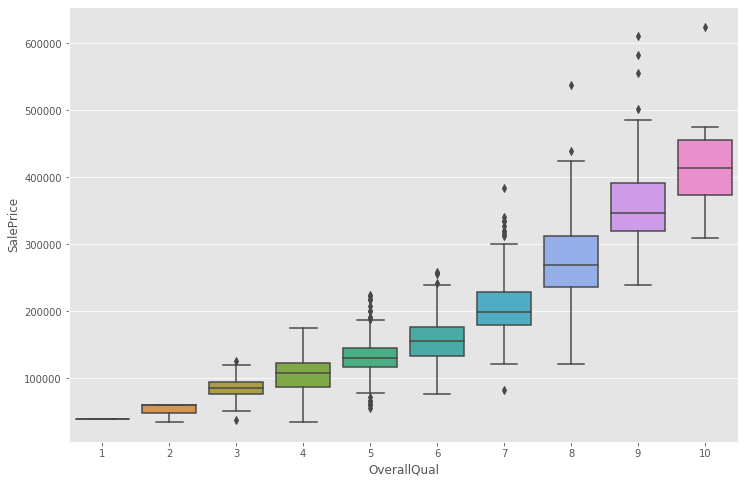

In [29]:
fig = plt.figure(figsize=(12,8))
sns.boxplot(data = df[['SalePrice', 'OverallQual']], x = 'OverallQual', y = 'SalePrice')

In [30]:
corr= df.corr()
corr['SalePrice'].sort_values(ascending = False).head(10)

SalePrice       1.000000
OverallQual     0.812936
GrLivArea       0.719120
TotalBsmtSF     0.663667
GarageCars      0.658363
GarageArea      0.650874
1stFlrSF        0.639243
FullBath        0.566184
YearBuilt       0.555869
YearRemodAdd    0.540151
Name: SalePrice, dtype: float64

# Numerical Features


In [31]:
#num_both = df_both.select_dtypes(include = [np.number])

#num_both.isnull().sum().sort_values(ascending = False)

In [32]:
num = df.select_dtypes(include = [np.number])

num.isnull().sum().sort_values(ascending = False)

GarageYrBlt      74
MasVnrArea        6
SalePrice         0
1stFlrSF          0
CentralAir        0
TotalBsmtSF       0
BsmtUnfSF         0
YearRemodAdd      0
YearBuilt         0
GrLivArea         0
OverallCond       0
OverallQual       0
LandSlope         0
LotArea           0
LotFrontage       0
MSSubClass        0
2ndFlrSF          0
BsmtFullBath      0
YrSold            0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
ScreenPorch       0
MoSold            0
Id                0
dtype: int64

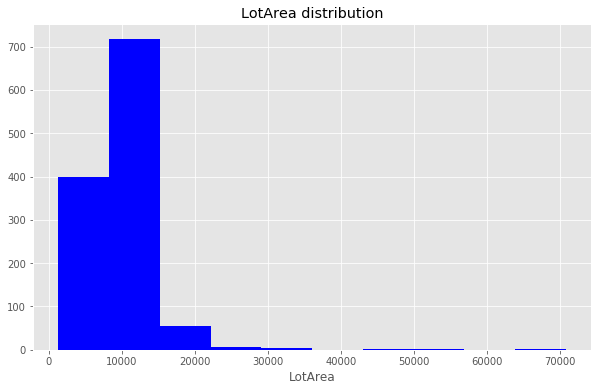

In [33]:
fig = plt.figure(figsize=(10,6))
plt.hist(df.LotArea, color = 'b')
plt.xlabel('LotArea')
plt.title('LotArea distribution')
plt.show()

In [34]:
df_both['LotFrontage'] = df_both.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

In [35]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

In [36]:
na_transform = df[['MasVnrArea', 'BsmtHalfBath', 'BsmtFullBath', 'GarageCars', \
                    'GarageArea', 'TotalBsmtSF', 'BsmtUnfSF']]
for x in na_transform:
    df_both[x] = df_both[x].fillna(0)

In [37]:
df_na_transform = df[['MasVnrArea', 'BsmtHalfBath', 'BsmtFullBath', 'GarageCars', \
                    'GarageArea', 'TotalBsmtSF', 'BsmtUnfSF']]
for x in df_na_transform:
    df[x] = df[x].fillna(0)

In [38]:
df_both['GarageYrBlt'] = df_both['GarageYrBlt'].transform(lambda x: x.fillna(x.mean()))

In [39]:
df['GarageYrBlt'] = df['GarageYrBlt'].transform(lambda x: x.fillna(x.mean()))

In [40]:
#num_both = df_both.select_dtypes(include = [np.number])
#num_both.isnull().sum().sort_values(ascending = False)

In [41]:
num = df.select_dtypes(include = [np.number])
num.isnull().sum().sort_values(ascending = False)

SalePrice        0
YearRemodAdd     0
2ndFlrSF         0
1stFlrSF         0
CentralAir       0
TotalBsmtSF      0
BsmtUnfSF        0
MasVnrArea       0
YearBuilt        0
YrSold           0
OverallCond      0
OverallQual      0
LandSlope        0
LotArea          0
LotFrontage      0
MSSubClass       0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
ScreenPorch      0
MoSold           0
Id               0
dtype: int64

In [42]:
#num.columns

## Datetime Features

In [43]:
#year_var = [feature for feature in num if 'Yr' in feature or 'Year' in feature]
#year_var



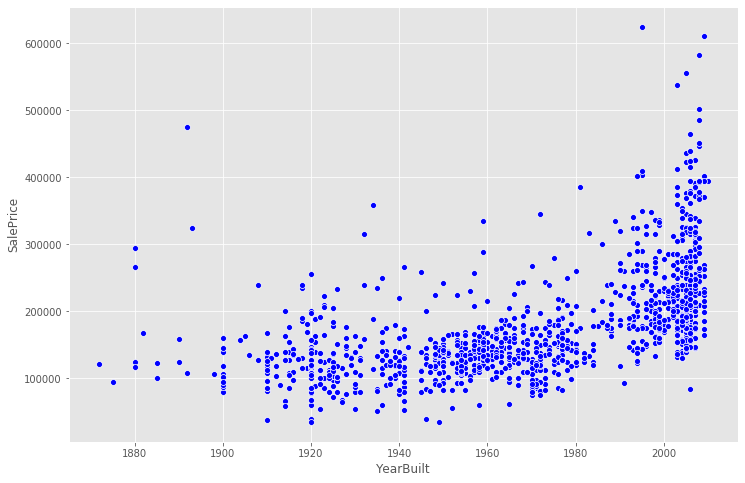

In [44]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x = 'YearBuilt', y = 'SalePrice',data = df, color = 'b')

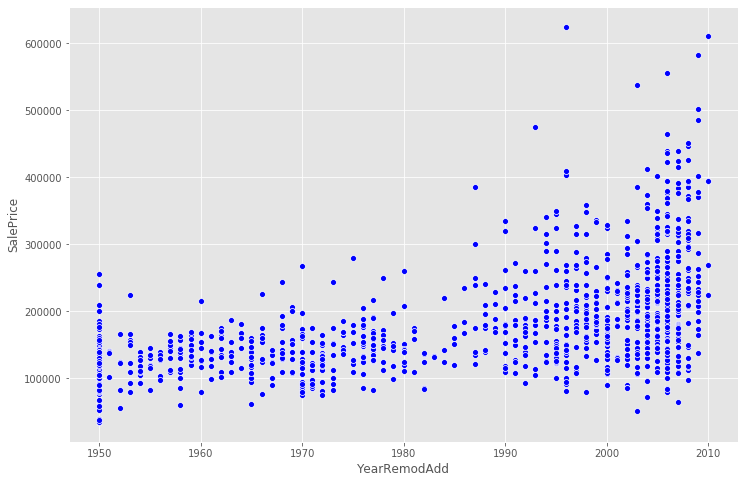

In [45]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x = 'YearRemodAdd', y = 'SalePrice',data = df, color = 'b')

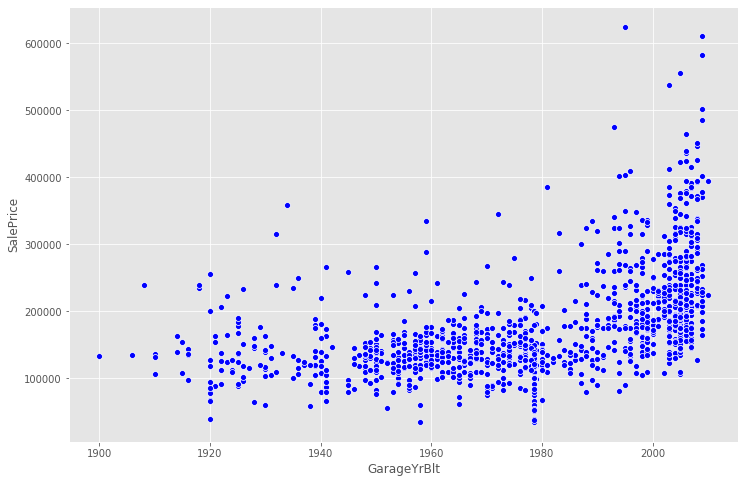

In [46]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(x = 'GarageYrBlt', y = 'SalePrice',data = df, color = 'b')

In [47]:
#for year in ['GarageYrBlt','YearBuilt', 'YearRemodAdd']:
 #   df[year] = df['YrSold']-df[year]

#df = df.drop(['YrSold'], axis = 1)

In [48]:
for year in ['GarageYrBlt','YearBuilt', 'YearRemodAdd', 'YrSold']:
    df[year] = 2012-df[year]

#df = df.drop(['YrSold'], axis = 1)

## Lognormal transformation

In [49]:
df['LotArea']= np.log(df['LotArea'])
df['LotArea'].skew()

-0.9437624450382303

# Categorical Features

In [50]:
categ = df.select_dtypes(exclude = [np.number])
#categ_both = df_both.select_dtypes(exclude = [np.number])
#categ_both.isnull().sum().sort_values(ascending = False)

In [51]:
categ = df.select_dtypes(exclude = [np.number])
categ.isnull().sum().sort_values(ascending = False)

PoolQC           1184
MiscFeature      1149
Alley            1102
Fence             962
FireplaceQu       599
GarageQual         74
GarageFinish       74
GarageType         74
BsmtExposure       32
BsmtQual           31
BsmtFinType1       31
MasVnrType          6
Electrical          1
Condition1          0
HouseStyle          0
BldgType            0
LandContour         0
Neighborhood        0
LotConfig           0
Exterior1st         0
LotShape            0
RoofStyle           0
SaleCondition       0
Exterior2nd         0
ExterQual           0
ExterCond           0
Foundation          0
SaleType            0
HeatingQC           0
KitchenQual         0
Functional          0
PavedDrive          0
MSZoning            0
dtype: int64

In [52]:
df['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'SawyerW', 'NAmes',
       'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'StoneBr', 'ClearCr',
       'Gilbert', 'NWAmes', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

## Garage

In [53]:
garage_var = [x for x in df_both if 'Garage' in x]
for x in garage_var:
    df_both[x] = df_both[x].fillna('NA')

In [54]:
df_garage_var = [x for x in df if 'Garage' in x]
for x in df_garage_var:
    df[x] = df[x].fillna('NA')

In [55]:

df_both['GarageType'].isnull().sum()

0

In [56]:
df['GarageType'].isnull().sum()

0

## Basement 

In [57]:
bsmt_var = [x for x in df_both if 'Bsmt' in x]
for x in bsmt_var:
    df_both[x] = df_both[x].fillna('NA')

In [58]:
df_bsmt_var = [x for x in df if 'Bsmt' in x]
for x in df_bsmt_var:
    df[x] = df[x].fillna('NA')

In [59]:
df['BsmtQual'].isnull().sum()

0

## Pool 


In [60]:
#df_both['PoolArea'].value_counts()

In [61]:
#df['PoolArea'].value_counts()

In [62]:
df_both['PoolQC'] = df_both['PoolQC'].fillna('NA')


In [63]:
df['PoolQC'] = df['PoolQC'].fillna('NA')

### MiscFeature

In [64]:
df_both['MiscFeature'].isna().sum()/len(df_both)

0.9640287769784173

In [65]:
df['MiscFeature'].isna().sum()/len(df)

0.9671717171717171

In [66]:
df_both = df_both.drop(['MiscFeature'], axis = 1)

In [67]:
df = df.drop(['MiscFeature'], axis = 1)

### Alley


In [68]:
df_both['Alley'] = df_both['Alley'].fillna('NoAlley')

In [69]:
df['Alley'] = df['Alley'].fillna('NoAlley')

### Fence

In [70]:
len(df) - df['Fence'].value_counts().sum()

962

In [71]:
df_both['Fence'] = df_both['Fence'].fillna('NoFence')

In [72]:
df['Fence'] = df['Fence'].fillna('NoFence')

### FireplaceQu

In [73]:
df['Fireplaces'].value_counts()

0    599
1    515
2     71
3      3
Name: Fireplaces, dtype: int64

In [74]:
df_both['FireplaceQu'] = df_both['FireplaceQu'].fillna('NA')

In [75]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('NA')

### The rest of categorical features  

In [76]:
mode_transform = df_both[['MSZoning', 'Utilities', 'Functional', 'Exterior1st', \
                    'Exterior2nd', 'SaleType', 'Electrical', 'KitchenQual']]
for x in mode_transform:
    df_both[x] = df_both[x].fillna(df_both[x].mode()[0])

In [77]:
df_mode_transform = df[['MSZoning', 'Functional', 'Exterior1st', \
                    'Exterior2nd', 'SaleType', 'Electrical', 'KitchenQual']]
for x in df_mode_transform:
    df[x] = df[x].fillna(df[x].mode()[0])

In [78]:
df_both['MasVnrType'] = df_both['MasVnrType'].fillna('NoMasVnr')

In [79]:
df['MasVnrType'] = df['MasVnrType'].fillna('NoMasVnr')

In [80]:
#categ_both = df_both.select_dtypes(exclude = [np.number])
#categ_both.isnull().sum().sort_values(ascending = False)

In [81]:
categ = df.select_dtypes(exclude = [np.number])
categ.isnull().sum().sort_values(ascending = False)

SaleCondition    0
SaleType         0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
HeatingQC        0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
PavedDrive       0
PoolQC           0
Fence            0
MSZoning         0
dtype: int64

## Feature Engineering


In [82]:
#???df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [83]:
#???df['TotalPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['WoodDeckSF']+ df['3SsnPorch'] +df['ScreenPorch'] 

In [84]:
#move it to the beginning of the categorical features section

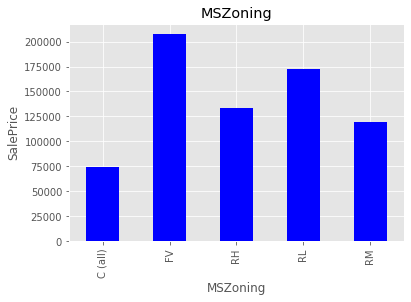

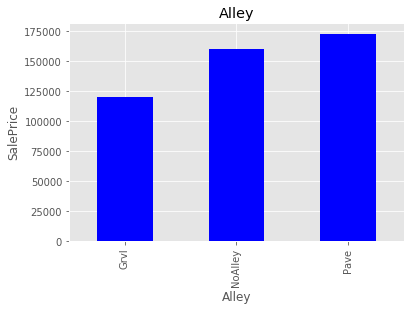

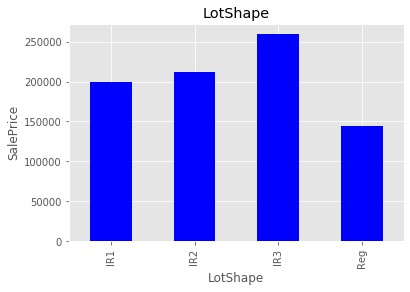

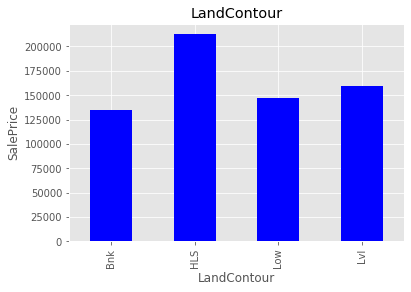

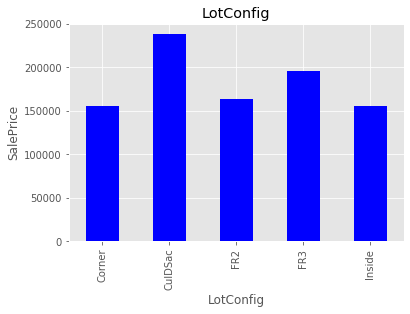

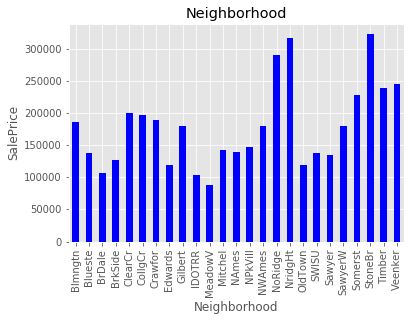

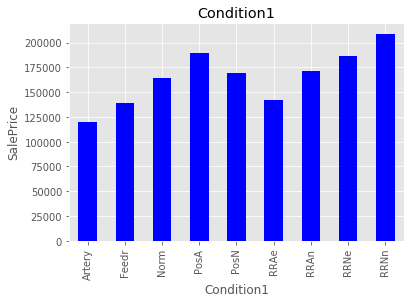

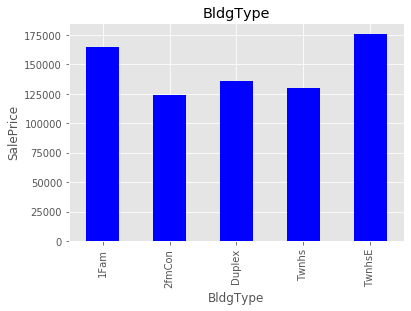

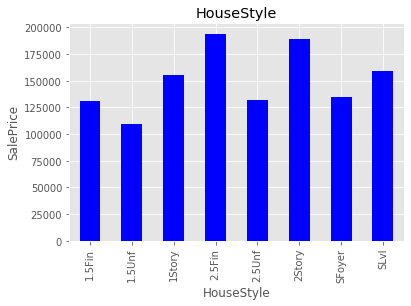

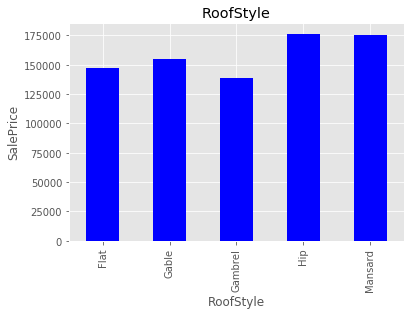

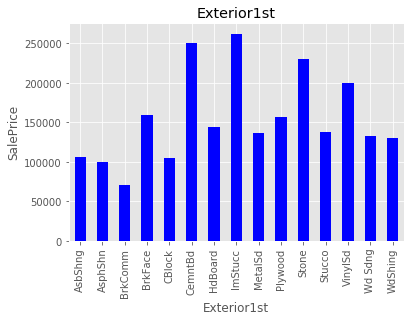

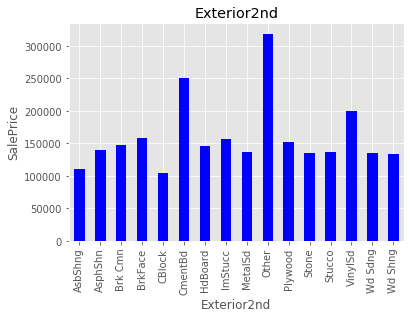

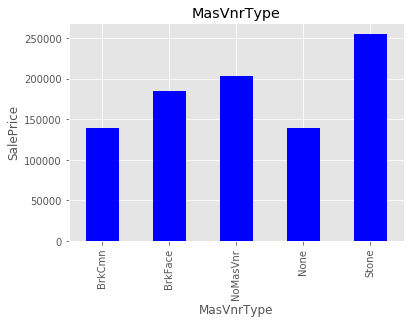

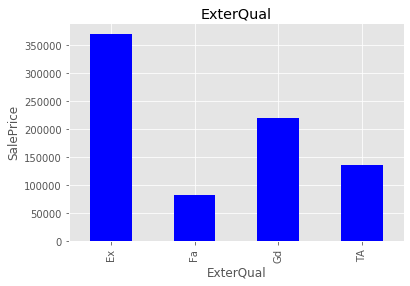

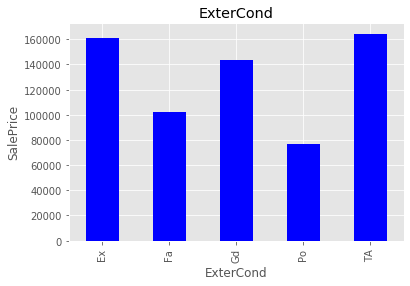

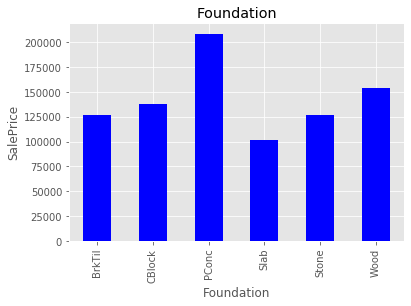

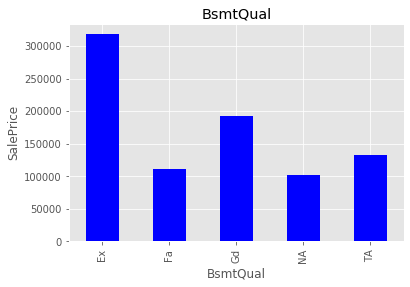

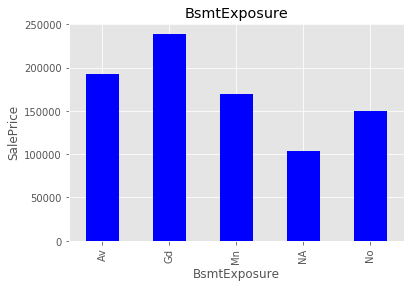

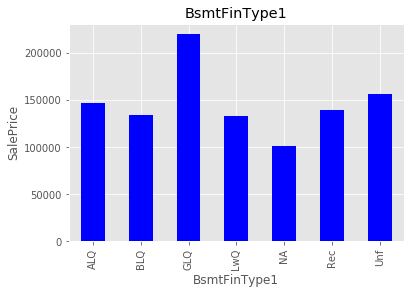

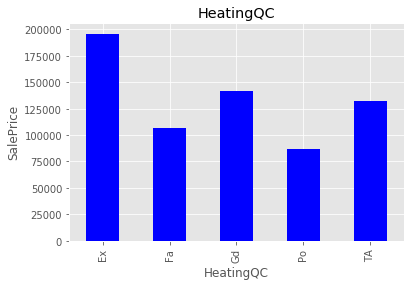

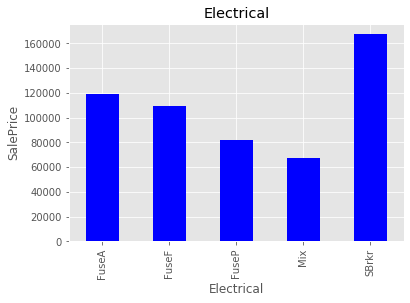

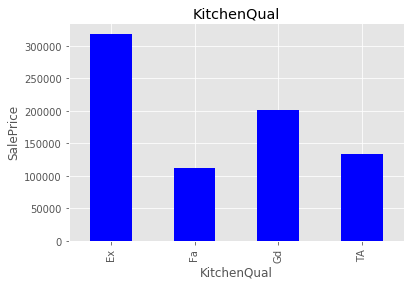

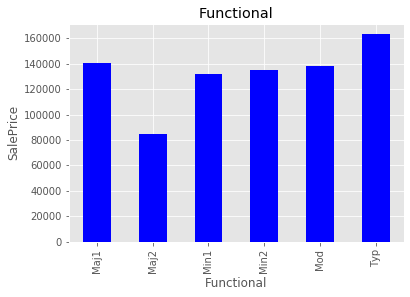

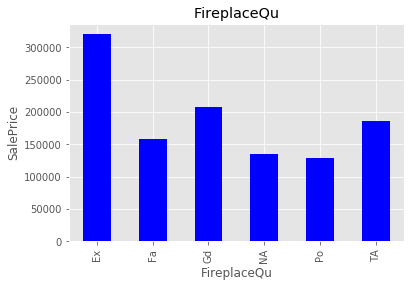

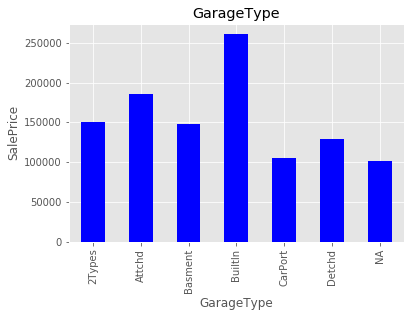

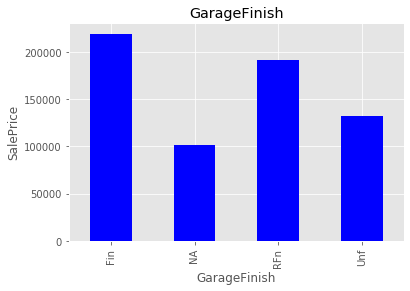

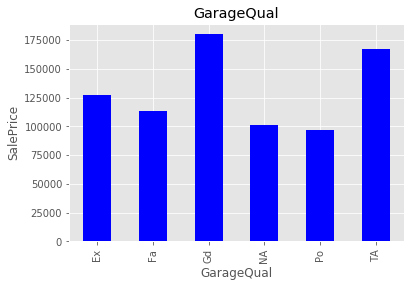

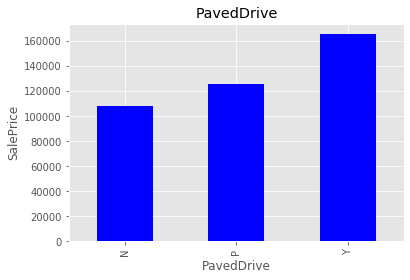

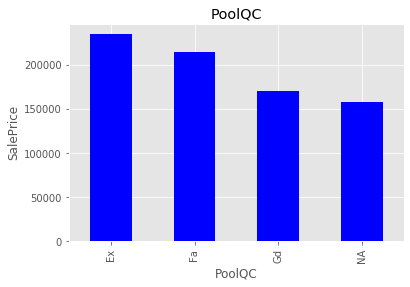

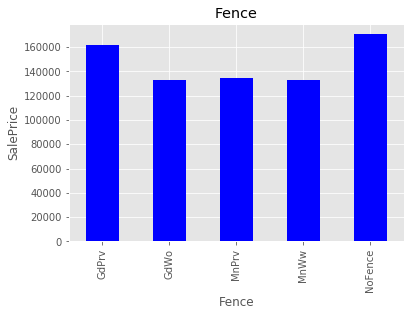

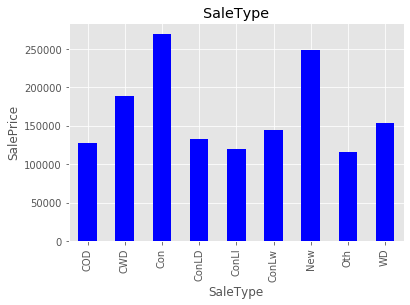

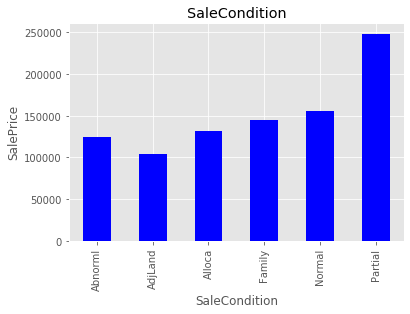

In [85]:
for feature in categ:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar(color = 'b')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

## Ordinal Categorical Features

In [86]:
ordinal_features= ['BsmtExposure','ExterCond','ExterQual','HeatingQC','KitchenQual',\
                'BsmtQual', 'FireplaceQu', 'GarageQual',\
                'PoolQC']
             

In [87]:
both_ordered = df_both.replace({'Ex': 5, 'Gd':4, 'TA':3, 'Av':3, 'Fa':2, 'Mn':2, 'No':1, 'Po':1, 'NA':0}, regex = False)

In [88]:
df_ordered = df.replace({'Ex': 5, 'Gd':4, 'TA':3, 'Av':3, 'Fa':2, 'Mn':2, 'No':1, 'Po':1, 'NA':0}, regex = False)

In [89]:
df_ordered

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,9.041922,NoAlley,Reg,Lvl,Inside,1,CollgCr,Norm,1Fam,2Story,7,5,9,9,Gable,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,1,GLQ,150,856,5,1,SBrkr,856,854,1710,1,0,2,1,3,1,4,8,Typ,0,0,Attchd,9.0,RFn,2,548,3,Y,0,61,0,0,0,NoFence,2,4,WD,Normal,208500
1,2,20,RL,80.0,9.169518,NoAlley,Reg,Lvl,FR2,1,Veenker,Feedr,1Fam,1Story,6,8,36,36,Gable,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,4,ALQ,284,1262,5,1,SBrkr,1262,0,1262,0,1,2,0,3,1,3,6,Typ,1,3,Attchd,36.0,RFn,2,460,3,Y,298,0,0,0,0,NoFence,5,5,WD,Normal,181500
2,3,60,RL,68.0,9.328123,NoAlley,IR1,Lvl,Inside,1,CollgCr,Norm,1Fam,2Story,7,5,11,10,Gable,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,2,GLQ,434,920,5,1,SBrkr,920,866,1786,1,0,2,1,3,1,4,6,Typ,1,3,Attchd,11.0,RFn,2,608,3,Y,0,42,0,0,0,NoFence,9,4,WD,Normal,223500
3,4,70,RL,60.0,9.164296,NoAlley,IR1,Lvl,Corner,1,Crawfor,Norm,1Fam,2Story,7,5,97,42,Gable,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,1,ALQ,540,756,4,1,SBrkr,961,756,1717,1,0,1,0,3,1,4,7,Typ,1,4,Detchd,14.0,Unf,3,642,3,Y,0,35,272,0,0,NoFence,2,6,WD,Abnorml,140000
4,5,60,RL,84.0,9.565214,NoAlley,IR1,Lvl,FR2,1,NoRidge,Norm,1Fam,2Story,8,5,12,12,Gable,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,GLQ,490,1145,5,1,SBrkr,1145,1053,2198,1,0,2,1,4,1,4,9,Typ,1,3,Attchd,12.0,RFn,3,836,3,Y,192,84,0,0,0,NoFence,12,4,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,8.976768,NoAlley,Reg,Lvl,Inside,1,Gilbert,Norm,1Fam,2Story,6,5,13,12,Gable,VinylSd,VinylSd,None,0.0,3,3,PConc,4,1,Unf,953,953,5,1,SBrkr,953,694,1647,0,0,2,1,3,1,3,7,Typ,1,3,Attchd,13.0,RFn,2,460,3,Y,0,40,0,0,0,NoFence,8,5,WD,Normal,175000
1456,1457,20,RL,85.0,9.486076,NoAlley,Reg,Lvl,Inside,1,NWAmes,Norm,1Fam,1Story,6,6,34,24,Gable,Plywood,Plywood,Stone,119.0,3,3,CBlock,4,1,ALQ,589,1542,3,1,SBrkr,2073,0,2073,1,0,2,0,3,1,3,7,Min1,2,3,Attchd,34.0,Unf,2,500,3,Y,349,0,0,0,0,MnPrv,2,2,WD,Normal,210000
1457,1458,70,RL,66.0,9.109636,NoAlley,Reg,Lvl,Inside,1,Crawfor,Norm,1Fam,2Story,7,9,71,6,Gable,CemntBd,CmentBd,None,0.0,5,4,Stone,3,1,GLQ,877,1152,5,1,SBrkr,1188,1152,2340,0,0,2,0,4,1,4,9,Typ,2,4,Attchd,71.0,RFn,1,252,3,Y,0,60,0,0,0,GdPrv,5,2,WD,Normal,266500
1458,1459,20,RL,68.0,9.181632,NoAlley,Reg,Lvl,Inside,1,NAmes,Norm,1Fam,1Story,5,6,62,16,Hip,MetalSd,MetalSd,None,0.0,3,3,CBlock,3,2,GLQ,0,1078,4,1,FuseA,1078,0,1078,1,0,1,0,2,1,4,5,Typ,0,0,Attchd,62.0,Unf,1,240,3,Y,366,0,112,0,0,NoFence,4,2,WD,Normal,142125


In [90]:
for x in ordinal_features:
    df_both[x] = both_ordered[x]

In [91]:
for x in ordinal_features:
    df[x] = df_ordered[x]

In [92]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,9.041922,NoAlley,Reg,Lvl,Inside,1,CollgCr,Norm,1Fam,2Story,7,5,9,9,Gable,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,1,GLQ,150,856,5,1,SBrkr,856,854,1710,1,0,2,1,3,1,4,8,Typ,0,0,Attchd,9.0,RFn,2,548,3,Y,0,61,0,0,0,NoFence,2,4,WD,Normal,208500
1,2,20,RL,80.0,9.169518,NoAlley,Reg,Lvl,FR2,1,Veenker,Feedr,1Fam,1Story,6,8,36,36,Gable,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,4,ALQ,284,1262,5,1,SBrkr,1262,0,1262,0,1,2,0,3,1,3,6,Typ,1,3,Attchd,36.0,RFn,2,460,3,Y,298,0,0,0,0,NoFence,5,5,WD,Normal,181500
2,3,60,RL,68.0,9.328123,NoAlley,IR1,Lvl,Inside,1,CollgCr,Norm,1Fam,2Story,7,5,11,10,Gable,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,2,GLQ,434,920,5,1,SBrkr,920,866,1786,1,0,2,1,3,1,4,6,Typ,1,3,Attchd,11.0,RFn,2,608,3,Y,0,42,0,0,0,NoFence,9,4,WD,Normal,223500
3,4,70,RL,60.0,9.164296,NoAlley,IR1,Lvl,Corner,1,Crawfor,Norm,1Fam,2Story,7,5,97,42,Gable,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3,1,ALQ,540,756,4,1,SBrkr,961,756,1717,1,0,1,0,3,1,4,7,Typ,1,4,Detchd,14.0,Unf,3,642,3,Y,0,35,272,0,0,NoFence,2,6,WD,Abnorml,140000
4,5,60,RL,84.0,9.565214,NoAlley,IR1,Lvl,FR2,1,NoRidge,Norm,1Fam,2Story,8,5,12,12,Gable,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,GLQ,490,1145,5,1,SBrkr,1145,1053,2198,1,0,2,1,4,1,4,9,Typ,1,3,Attchd,12.0,RFn,3,836,3,Y,192,84,0,0,0,NoFence,12,4,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,8.976768,NoAlley,Reg,Lvl,Inside,1,Gilbert,Norm,1Fam,2Story,6,5,13,12,Gable,VinylSd,VinylSd,None,0.0,3,3,PConc,4,1,Unf,953,953,5,1,SBrkr,953,694,1647,0,0,2,1,3,1,3,7,Typ,1,3,Attchd,13.0,RFn,2,460,3,Y,0,40,0,0,0,NoFence,8,5,WD,Normal,175000
1456,1457,20,RL,85.0,9.486076,NoAlley,Reg,Lvl,Inside,1,NWAmes,Norm,1Fam,1Story,6,6,34,24,Gable,Plywood,Plywood,Stone,119.0,3,3,CBlock,4,1,ALQ,589,1542,3,1,SBrkr,2073,0,2073,1,0,2,0,3,1,3,7,Min1,2,3,Attchd,34.0,Unf,2,500,3,Y,349,0,0,0,0,MnPrv,2,2,WD,Normal,210000
1457,1458,70,RL,66.0,9.109636,NoAlley,Reg,Lvl,Inside,1,Crawfor,Norm,1Fam,2Story,7,9,71,6,Gable,CemntBd,CmentBd,None,0.0,5,4,Stone,3,1,GLQ,877,1152,5,1,SBrkr,1188,1152,2340,0,0,2,0,4,1,4,9,Typ,2,4,Attchd,71.0,RFn,1,252,3,Y,0,60,0,0,0,GdPrv,5,2,WD,Normal,266500
1458,1459,20,RL,68.0,9.181632,NoAlley,Reg,Lvl,Inside,1,NAmes,Norm,1Fam,1Story,5,6,62,16,Hip,MetalSd,MetalSd,None,0.0,3,3,CBlock,3,2,GLQ,0,1078,4,1,FuseA,1078,0,1078,1,0,1,0,2,1,4,5,Typ,0,0,Attchd,62.0,Unf,1,240,3,Y,366,0,112,0,0,NoFence,4,2,WD,Normal,142125


In [93]:
df['GarageYrBlt'].dtypes
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)

## Nominal Categorical Features

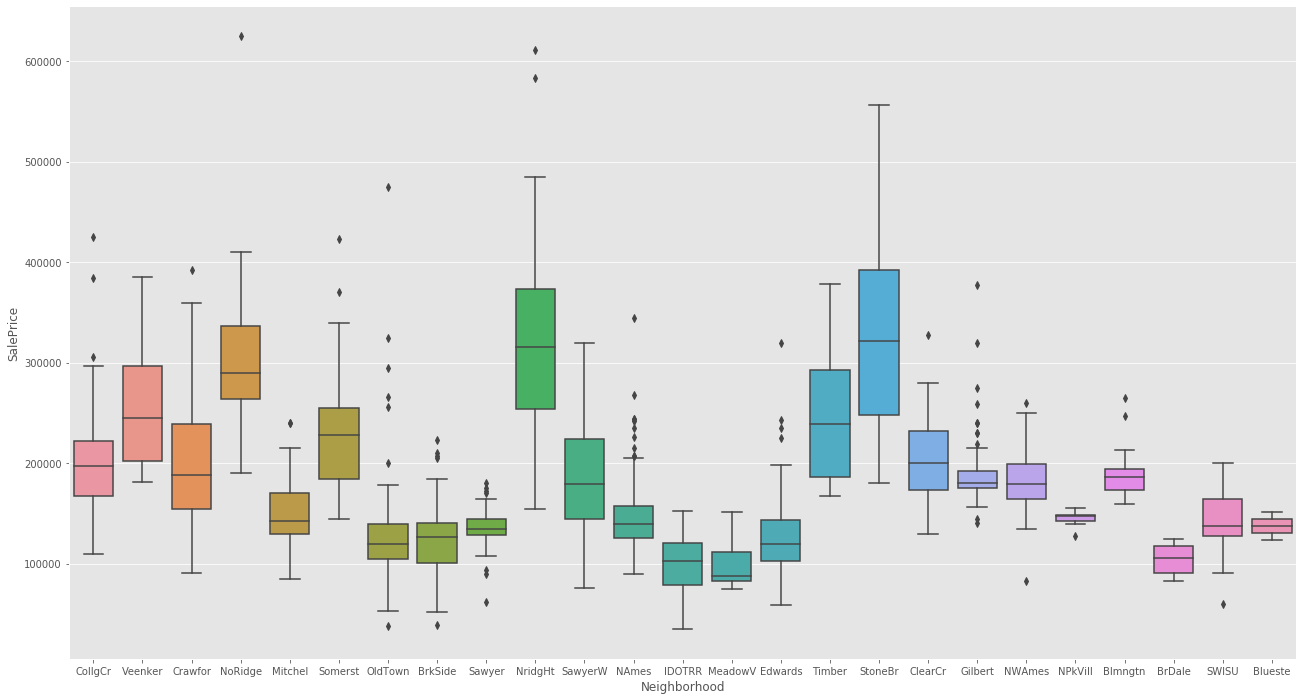

In [94]:
fig = plt.figure(figsize=(22,12))
sns.boxplot(data = df[['SalePrice', 'Neighborhood']], x = 'Neighborhood', y = 'SalePrice')

In [95]:
df['Neighborhood'].value_counts()

NAmes      184
CollgCr    126
OldTown    108
Edwards     90
Somerst     78
NridgHt     74
BrkSide     51
SawyerW     50
Gilbert     49
Sawyer      48
NWAmes      44
Crawfor     41
Mitchel     36
IDOTRR      34
NoRidge     31
Timber      29
SWISU       23
StoneBr     20
BrDale      16
MeadowV     15
Blmngtn     14
ClearCr     11
Veenker      7
NPkVill      7
Blueste      2
Name: Neighborhood, dtype: int64

In [96]:

nbhd = df.groupby(['Neighborhood'])['SalePrice'].median().sort_values(ascending= False)
#nbhd

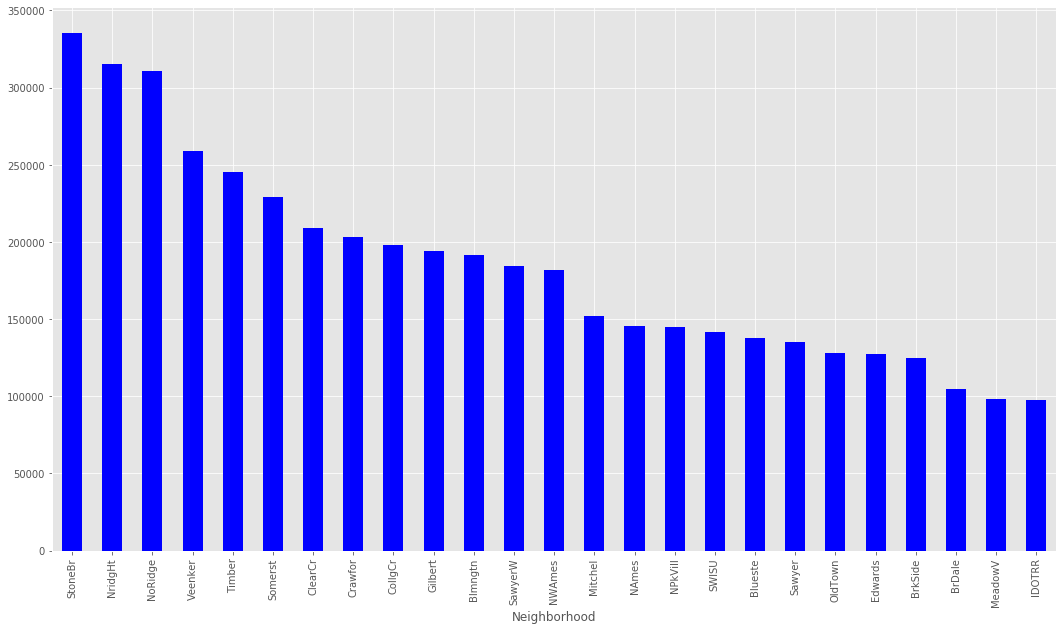

In [97]:
fig = plt.figure(figsize=(18,10))
df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending = False).plot(kind = 'bar',color = 'b')

In [98]:
#df['SalePrice'] = np.log(df['SalePrice'])
df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending = False)

Neighborhood
StoneBr    335523.750000
NridgHt    315433.621622
NoRidge    310793.806452
Veenker    258714.285714
Timber     245343.206897
Somerst    229254.692308
ClearCr    208721.090909
Crawfor    203298.463415
CollgCr    197937.825397
Gilbert    194059.306122
Blmngtn    191790.357143
SawyerW    184601.840000
NWAmes     182079.545455
Mitchel    152031.555556
NAmes      145360.233696
NPkVill    144642.857143
SWISU      141947.130435
Blueste    137500.000000
Sawyer     135180.041667
OldTown    128329.435185
Edwards    127112.777778
BrkSide    124752.450980
BrDale     104493.750000
MeadowV     98486.666667
IDOTRR      97796.470588
Name: SalePrice, dtype: float64

In [99]:
df.loc[((df['Neighborhood'] =='BrDale') | (df['Neighborhood'] =='MeadowV') | (df['Neighborhood'] =='IDOTRR')),\
       'Neighborhood'] = "Band_1"

In [100]:
df.loc[((df['Neighborhood'] =='OldTown') | (df['Neighborhood'] =='Edwards') | (df['Neighborhood'] =='BrkSide')),\
       'Neighborhood'] = "Band_2"

In [101]:
df.loc[((df['Neighborhood'] =='Mitchel') | (df['Neighborhood'] =='NAmes') \
        | (df['Neighborhood'] == 'NPkVill') | (df['Neighborhood'] =='SWISU')\
          | (df['Neighborhood'] =='Blueste') | (df['Neighborhood'] =='Sawyer')), 'Neighborhood'] = "Band_3"

In [102]:
df.loc[((df['Neighborhood'] =='ClearCr') | (df['Neighborhood'] =='Crawfor') |\
        (df['Neighborhood'] =='CollgCr') | (df['Neighborhood'] =='Gilbert')) | (df['Neighborhood'] =='Blmngtn') |\
        (df['Neighborhood'] =='SawyerW') | (df['Neighborhood'] =='NWAmes'),\
       'Neighborhood'] = "Band_4"
       
     
       
       

In [103]:
df.loc[((df['Neighborhood'] =='Veenker') | (df['Neighborhood'] =='Timber') | (df['Neighborhood'] =='Somerst')),\
       'Neighborhood'] = "Band_5"

In [104]:
df.loc[((df['Neighborhood'] =='StoneBr') | (df['Neighborhood'] =='NridgHt') | (df['Neighborhood'] =='NoRidge')),\
       'Neighborhood'] = "Band_6"

In [105]:
df['Neighborhood'].unique()

array(['Band_4', 'Band_5', 'Band_6', 'Band_3', 'Band_2', 'Band_1'],
      dtype=object)

In [106]:
df['MSSubClass'] = df['MSSubClass'].astype('category')
df['MoSold'] = df['MoSold'].astype('category')

In [107]:
nominal_features=['MSSubClass', 'MoSold','MSZoning','Alley','LotShape','LandContour', \
                  'LotConfig', 'Neighborhood','Condition1',\
                  'BldgType','HouseStyle','RoofStyle','Exterior1st','Exterior2nd',\
                  'MasVnrType','Foundation','BsmtFinType1',\
                  'Electrical','Functional','GarageType','GarageFinish','PavedDrive',\
                  'Fence','SaleType','SaleCondition']


ordinal_features= ['BsmtExposure','ExterCond','ExterQual','HeatingQC','KitchenQual',\
                'BsmtQual','BsmtCond', 'FireplaceQu', 'GarageQual','GarageCond',\
                'PoolQC']


categorical_features = nominal_features + ordinal_features



In [108]:
df_nominal = df[['MSSubClass', 'MoSold','MSZoning','Alley','LotShape','LandContour',\
                  'LotConfig','Neighborhood','Condition1',\
                  'BldgType','HouseStyle','RoofStyle','Exterior1st','Exterior2nd',\
                  'MasVnrType','Foundation','BsmtFinType1',\
                  'Electrical','Functional','GarageType','GarageFinish','PavedDrive',\
                  'Fence','SaleType','SaleCondition']]
df_nominal

,MSSubClass,MoSold,MSZoning,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtFinType1,Electrical,Functional,GarageType,GarageFinish,PavedDrive,Fence,SaleType,SaleCondition
0,60,2,RL,NoAlley,Reg,Lvl,Inside,Band_4,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,GLQ,SBrkr,Typ,Attchd,RFn,Y,NoFence,WD,Normal
1,20,5,RL,NoAlley,Reg,Lvl,FR2,Band_5,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,CBlock,ALQ,SBrkr,Typ,Attchd,RFn,Y,NoFence,WD,Normal
2,60,9,RL,NoAlley,IR1,Lvl,Inside,Band_4,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,GLQ,SBrkr,Typ,Attchd,RFn,Y,NoFence,WD,Normal
3,70,2,RL,NoAlley,IR1,Lvl,Corner,Band_4,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,BrkTil,ALQ,SBrkr,Typ,Detchd,Unf,Y,NoFence,WD,Abnorml
4,60,12,RL,NoAlley,IR1,Lvl,FR2,Band_6,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,GLQ,SBrkr,Typ,Attchd,RFn,Y,NoFence,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,8,RL,NoAlley,Reg,Lvl,Inside,Band_4,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,None,PConc,Unf,SBrkr,Typ,Attchd,RFn,Y,NoFence,WD,Normal
1456,20,2,RL,NoAlley,Reg,Lvl,Inside,Band_4,Norm,1Fam,1Story,Gable,Plywood,Plywood,Stone,CBlock,ALQ,SBrkr,Min1,Attchd,Unf,Y,MnPrv,WD,Normal
1457,70,5,RL,NoAlley,Reg,Lvl,Inside,Band_4,Norm,1Fam,2Story,Gable,CemntBd,CmentBd,None,Stone,GLQ,SBrkr,Typ,Attchd,RFn,Y,GdPrv,WD,Normal
1458,20,4,RL,NoAlley,Reg,Lvl,Inside,Band_3,Norm,1Fam,1Story,Hip,MetalSd,MetalSd,None,CBlock,GLQ,FuseA,Typ,Attchd,Unf,Y,NoFence,WD,Normal


In [109]:
y = np.log(df['SalePrice'])

In [110]:
def col_dummified(data, col_name):
    for var in col_name:
        dum = pd.get_dummies(data.loc[:,var], prefix = var, prefix_sep = '__',drop_first=True)
        df_final = pd.concat([data.drop(var, axis = 1), dum], axis = 1, sort = 'False')
    return df_final    


In [111]:
df_copy = df.copy()
for var in df_nominal:
    df_copy = col_dummified(df_copy, [var])
df_dummified = df_copy

In [112]:
df_dummified = df_dummified.drop(['Id','SalePrice'], axis = 1)

In [113]:
df_dummified

,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,YrSold,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,MSSubClass__120,MSSubClass__160,MSSubClass__180,MSSubClass__190,MoSold__2,MoSold__3,MoSold__4,MoSold__5,MoSold__6,MoSold__7,MoSold__8,MoSold__9,MoSold__10,MoSold__11,MoSold__12,MSZoning__FV,MSZoning__RH,MSZoning__RL,MSZoning__RM,Alley__NoAlley,Alley__Pave,LotShape__IR2,LotShape__IR3,LotShape__Reg,LandContour__HLS,LandContour__Low,LandContour__Lvl,LotConfig__CulDSac,LotConfig__FR2,LotConfig__FR3,LotConfig__Inside,Neighborhood__Band_2,Neighborhood__Band_3,Neighborhood__Band_4,Neighborhood__Band_5,Neighborhood__Band_6,Condition1__Feedr,Condition1__Norm,Condition1__PosA,Condition1__PosN,Condition1__RRAe,Condition1__RRAn,Condition1__RRNe,Condition1__RRNn,BldgType__2fmCon,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,HouseStyle__1.5Unf,HouseStyle__1Story,HouseStyle__2.5Fin,HouseStyle__2.5Unf,HouseStyle__2Story,HouseStyle__SFoyer,HouseStyle__SLvl,RoofStyle__Gable,RoofStyle__Gambrel,RoofStyle__Hip,RoofStyle__Mansard,Exterior1st__AsphShn,Exterior1st__BrkComm,Exterior1st__BrkFace,Exterior1st__CBlock,Exterior1st__CemntBd,Exterior1st__HdBoard,Exterior1st__ImStucc,Exterior1st__MetalSd,Exterior1st__Plywood,Exterior1st__Stone,Exterior1st__Stucco,Exterior1st__VinylSd,Exterior1st__Wd Sdng,Exterior1st__WdShing,Exterior2nd__AsphShn,Exterior2nd__Brk Cmn,Exterior2nd__BrkFace,Exterior2nd__CBlock,Exterior2nd__CmentBd,Exterior2nd__HdBoard,Exterior2nd__ImStucc,Exterior2nd__MetalSd,Exterior2nd__Other,Exterior2nd__Plywood,Exterior2nd__Stone,Exterior2nd__Stucco,Exterior2nd__VinylSd,Exterior2nd__Wd Sdng,Exterior2nd__Wd Shng,MasVnrType__BrkFace,MasVnrType__NoMasVnr,MasVnrType__None,MasVnrType__Stone,Foundation__CBlock,Foundation__PConc,Foundation__Slab,Foundation__Stone,Foundation__Wood,BsmtFinType1__BLQ,BsmtFinType1__GLQ,BsmtFinType1__LwQ,BsmtFinType1__NA,BsmtFinType1__Rec,BsmtFinType1__Unf,Electrical__FuseF,Electrical__FuseP,Electrical__Mix,Electrical__SBrkr,Functional__Maj2,Functional__Min1,Functional__Min2,Functional__Mod,Functional__Typ,GarageType__Attchd,GarageType__Basment,GarageType__BuiltIn,GarageType__CarPort,GarageType__Detchd,GarageType__NA,GarageFinish__NA,GarageFinish__RFn,GarageFinish__Unf,PavedDrive__P,PavedDrive__Y,Fence__GdWo,Fence__MnPrv,Fence__MnWw,Fence__NoFence,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Normal,SaleCondition__Partial
0,65.0,9.041922,1,7,5,9,9,196.0,4,3,4,1,150,856,5,1,856,854,1710,1,0,2,1,3,1,4,8,0,0,9,2,548,3,0,61,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9.169518,1,6,8,36,36,0.0,3,3,4,4,284,1262,5,1,1262,0,1262,0,1,2,0,3,1,3,6,1,3,36,2,460,3,298,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,9.328123,1,7,5,11,10,162.0,4,3,4,2,434,920,5,1,920,866,1786,1,0,2,1,3,1,4,6,1,3,11,2,608,3,0,42,0,0,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,

# 2. Modelling


In [114]:
X = df_dummified
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1188, dtype: float64

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.20)

In [116]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

In [117]:
model = lm.fit(X_train, y_train)

In [118]:
#R Squared
model.score(X_test, y_test) 

0.911087757652413

In [119]:
predictions_linear = model.predict(X_test)

In [120]:
mse = mean_squared_error(y_test, predictions_linear)
mse

0.014660650397056971

In [121]:
import math
rmse = math.sqrt(mse)
rmse

0.12108117276049556

In [123]:
df_dummified.to_pickle("./test5.pkl")

In [124]:
y.to_pickle("./test5y.pkl")